## The Challenge...

The movie reviews website was very happy with your deliverable for the previous assignment and now they have a new request for you.

The previous consultant had created a chart for them which is illustrated on the next slide. However the Python code used to create the diagram has since been lost and cannot be recovered. Your task is to come up with the code that will re-create the same chart making it look as close as possible to the original.

A new dataset has been supplied. 

(c) Kirill Eremenko www.superdatascience.com

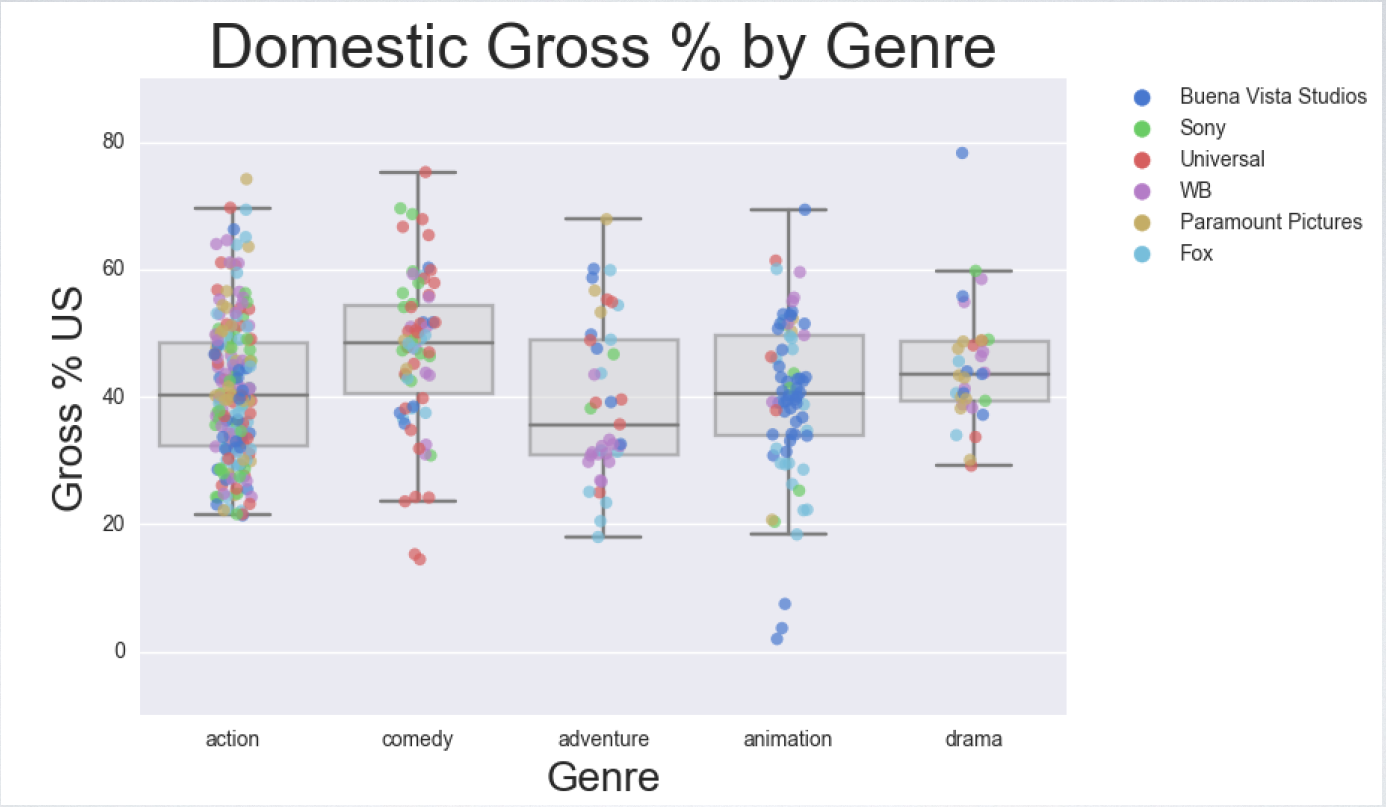

In [1]:
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('P4-Section6-Homework-Dataset.csv', encoding='unicode_escape')

In [3]:
len(movies)

608

In [4]:
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [5]:
movies.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [6]:
column_list = ['Day of Week', 'Director', 'Movie Title', 'Release Date',
       'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       ]

mov = movies.drop(column_list,1)

In [7]:
mov.head()

,Genre,Studio,Gross % US
0,action,Buena Vista Studios,44.6
1,action,Buena Vista Studios,21.4
2,action,Lionsgate,19.1
3,comedy,Sony,68.7
4,action,Sony,35.6


In [8]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Genre       608 non-null    object 
 1   Studio      608 non-null    object 
 2   Gross % US  608 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.4+ KB


In [9]:
mov.columns = ['Genre', 'Studio', 'Gross%US']

In [10]:
#mov2 = mov[(mov.Studio == 'Fox') | (mov.Studio == 'WB')]
genre_filter = ['action', 'adventure', 'animation', 'comedy', 'drama']
studio_filter = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']

mov2 = mov[mov.Genre.isin(genre_filter)]
mov3 = mov2[mov2.Studio.isin(studio_filter)]

In [11]:
mov3.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [12]:
mov3.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [13]:
mov3.Genre = mov3.Genre.astype('category')
mov3.Studio = mov3.Studio.astype('category')

In [14]:
mov3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Genre     423 non-null    category
 1   Studio    423 non-null    category
 2   Gross%US  423 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 7.9 KB


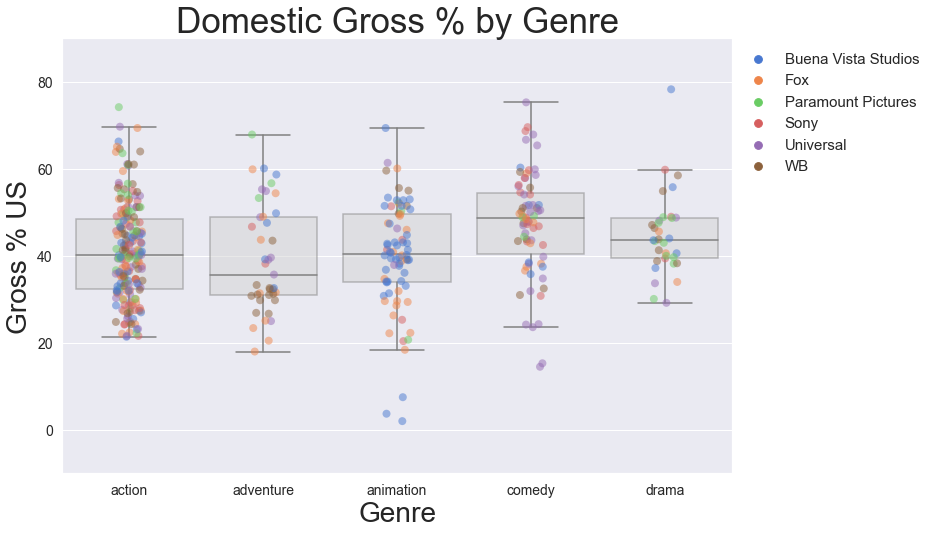

In [15]:
sns.set(style='darkgrid', palette='muted', color_codes=True)

f, axes = plt.subplots(1,1, figsize=(12,8))

w1 = sns.boxplot(data=mov3, x='Genre', y='Gross%US', color='lightgray', showfliers=False)
plt.setp(w1.artists, alpha=0.5)
w2 = sns.stripplot(data=mov3, x='Genre', y='Gross%US', hue='Studio', size=8, alpha=0.5, jitter=True)

plt.title('Domestic Gross % by Genre', fontsize=35)
plt.ylabel('Gross % US', fontsize=28)
plt.xlabel('Genre', fontsize=28)
plt.yticks(fontsize=14, ticks=[0,20,40,60,80])
plt.xticks(fontsize=14)
plt.ylim(-10,90)

plt.legend(prop={'size':15}, frameon=False, loc='upper right', bbox_to_anchor=[1.3, 1])
plt.show()